In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time

class Gene:
    def __init__(self, val, handicap):
        self.value = val
        self.handicap = handicap

class Animal:
    def __init__(self, a, b, is_male, hs = True):
        self.is_male = is_male
        self.chromosome1 = a
        self.chromosome2 = b
        self.handicap_strategy = hs
        self.quality = 0
        self.handicap = 0
        for ch in [self.chromosome1,self.chromosome2]:
            for g in ch:
                if g.handicap:
                    #self.handicap += g.value
                    if self.is_male:
                        self.handicap += g.value
                else:
                    self.quality += g.value
        self.quality -= self.handicap
        
    def get_gameta(self):
        k = np.random.randint(0, len(self.chromosome1))
        if np.random.randint(0,1):
            return self.chromosome1[:k] + self.chromosome2[k:]
        else:
            return self.chromosome2[:k] + self.chromosome1[k:]
        
    def homozygosity(self):
        return 1.0 * sum([1 for i in xrange(len(self.chromosome1)) 
                          if self.chromosome1[i].value == self.chromosome2[i].value]) / len(self.chromosome1)

class Population:
    def rnd_gameta(self):
        return [Gene(np.random.uniform(10,100), (i < self.hpA)) for i in xrange(self.GpA)]
    
    def __init__(self, size, GpA, hpA, hs_init_frac = 0.5): 
        #GpA - genes per animal, hpA - handicap genes per Animal
        self.size = size
        self.GpA = GpA
        self.hpA = hpA
        self.males = [Animal(self.rnd_gameta(), self.rnd_gameta(), 1) for i in xrange(self.size)]
        self.females = [Animal(self.rnd_gameta(), self.rnd_gameta(), 0, 
                               hs = (np.random.sample() < hs_init_frac)) for i in xrange(self.size)]
        
        #initialazing logs
        self.male_quality_log = [sum(a.quality for a in self.males) / self.size]
        self.male_homozygosity_log = [sum(a.homozygosity() for a in self.males) / self.size]
        self.female_quality_log = [sum(a.quality for a in self.females) / self.size]
        self.female_homozygosity_log = [sum(a.homozygosity() for a in self.females) / self.size]
        self.handicap_log = [sum([a.handicap for a in self.males]) / self.size]
        self.handicap_strategy_popularity = [float(sum([1 for a in self.females if a.handicap_strategy])) / self.size]
        
    def generation(self):
                
        #copulation
        for i in xrange(self.size):
            female = self.females[i]
            candidates = np.random.choice(self.males, size = min(10, len(self.males)), replace = False)
            if female.handicap_strategy:
                p = np.array([a.handicap + 1. for a in candidates])
            else:
                p = np.array([1. for a in candidates])
            p /= sum(p)
            if sum(p) != 1:
                p[-1] = 1 - sum(p[0:-1])
            male = np.random.choice(candidates, p = p)
            if np.random.randint(0,2):
                self.males.append(Animal(male.get_gameta(), female.get_gameta(), 1))
            else:
                self.females.append(Animal(male.get_gameta(), female.get_gameta(), 0, female.handicap_strategy))
        
        #killing
        p = np.array([a.quality + 1. for a in self.males])
        p /= sum(p)
        if sum(p) != 1:
            p[-1] = 1 - sum(p[:-1])
        self.males = list(np.random.choice(self.males, size = self.size, replace = False, p = p))
        
        p = np.array([a.quality + 1. for a in self.females])
        p /= sum(p)
        if sum(p) != 1:
            p[-1] = 1 - sum(p[:-1])
        self.females = list(np.random.choice(self.females, size = self.size, replace = False, p = p))
        
        
        #gathering statistics
        self.male_quality_log.append(sum([a.quality for a in self.males]) / self.size)
        self.male_homozygosity_log.append(sum([a.homozygosity() for a in self.males]) / self.size)
        self.female_quality_log.append(sum([a.quality for a in self.females]) / self.size)
        self.female_homozygosity_log.append(sum([a.homozygosity() for a in self.females]) / self.size)
        self.handicap_log.append(sum([a.handicap for a in self.males]) / self.size)
        self.handicap_strategy_popularity.append(sum([1. for a in self.females if a.handicap_strategy]) / self.size)
        
        

In [5]:
P1 = Population(GpA = 60, size = 100, hpA = 10, hs_init_frac = 0)
P2 = Population(GpA = 60, size = 100, hpA = 10, hs_init_frac = 0.25)
P3 = Population(GpA = 60, size = 100, hpA = 10, hs_init_frac = 0.5)
P4 = Population(GpA = 60, size = 100, hpA = 10, hs_init_frac = 0.75)
P5 = Population(GpA = 60, size = 100, hpA = 10, hs_init_frac = 1)

In [6]:
for P in [P1,P2,P3,P4,P5]:
    for t in xrange(1000):
        P.generation()

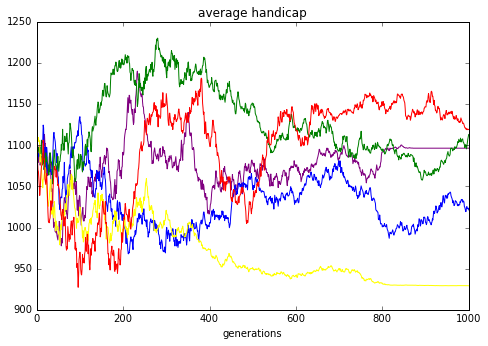

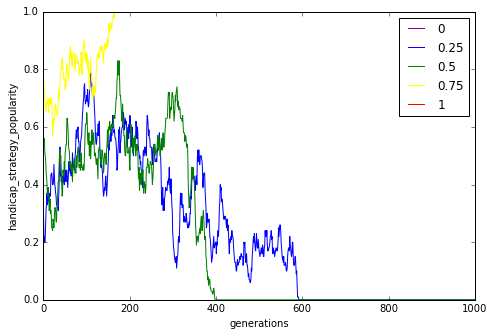

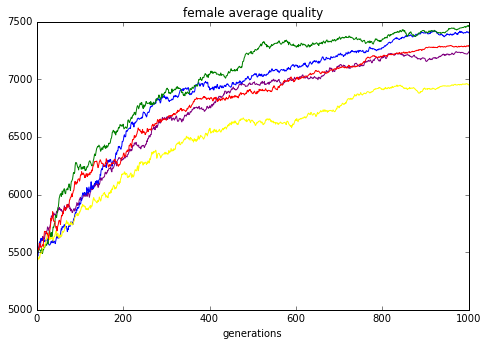

In [14]:
fig = plt.figure()
fig.add_axes([0,0,1,1])
plt.plot(range(len(P1.handicap_log)), P1.handicap_log, color='purple', linewidth=1, label="0")
plt.plot(range(len(P2.handicap_log)), P2.handicap_log, color='blue', linewidth=1, label="0.25")
plt.plot(range(len(P3.handicap_log)), P3.handicap_log, color='green', linewidth=1, label="0.5")
plt.plot(range(len(P4.handicap_log)), P4.handicap_log, color='yellow', linewidth=1, label="0.75")
plt.plot(range(len(P5.handicap_log)), P5.handicap_log, color='red', linewidth=1, label="1")
plt.title("average handicap")
plt.xlabel("generations")
#plt.legend()

fig = plt.figure() 
fig.add_axes([0,0,1,1])
plt.plot(range(len(P1.handicap_log)), P1.handicap_strategy_popularity, color='purple', linewidth=1, label="0")
plt.plot(range(len(P2.handicap_log)), P2.handicap_strategy_popularity, color='blue', linewidth=1, label="0.25")
plt.plot(range(len(P3.handicap_log)), P3.handicap_strategy_popularity, color='green', linewidth=1, label="0.5")
plt.plot(range(len(P4.handicap_log)), P4.handicap_strategy_popularity, color='yellow', linewidth=1, label="0.75")
plt.plot(range(len(P5.handicap_log)), P5.handicap_strategy_popularity, color='red', linewidth=1, label="1")
plt.xlabel("generations")
plt.ylabel("handicap_strategy_popularity")
plt.legend()

fig = plt.figure()
fig.add_axes([0,0,1,1])
plt.plot(range(len(P1.handicap_log)), P1.female_quality_log, color='purple', linewidth=1, label="0")
plt.plot(range(len(P2.handicap_log)), P2.female_quality_log, color='blue', linewidth=1, label="0.25")
plt.plot(range(len(P3.handicap_log)), P3.female_quality_log, color='green', linewidth=1, label="0.5")
plt.plot(range(len(P4.handicap_log)), P4.female_quality_log, color='yellow', linewidth=1, label="0.75")
plt.plot(range(len(P5.handicap_log)), P5.female_quality_log, color='red', linewidth=1, label="1")
plt.title("female average quality")
plt.xlabel("generations")
